> ## Import the libraries and read the data

In [42]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [43]:
df = pd.read_csv('/kaggle/input/crypto/BNB-USD.csv',index_col = ['Date'], parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-08,447.856812,458.483795,419.195465,430.246155,430.246155,4068139021
2022-01-09,430.253113,444.493256,428.239502,438.803070,438.803070,3347862691
2022-01-10,438.785645,445.036163,408.698792,424.933777,424.933777,4156063326
2022-01-11,424.891205,467.281067,422.000916,463.518311,463.518311,4600615710
2022-01-12,463.562744,489.327301,457.116119,487.007416,487.007416,4131335431


> ## Data Preprocessing, Cleansing, Exploration

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-01-08 to 2023-01-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       366 non-null    float64
 1   High       366 non-null    float64
 2   Low        366 non-null    float64
 3   Close      366 non-null    float64
 4   Adj Close  366 non-null    float64
 5   Volume     366 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.0 KB


df.isnull()

In [45]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [46]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,320.062969,327.586190,311.497178,319.555765,319.555765,1.417653e+09
std,68.130223,69.734656,66.486021,67.871182,67.871182,7.789709e+08
min,196.955795,216.082474,184.540054,197.042999,197.042999,2.761153e+08
25%,271.760132,275.996552,265.697304,271.579788,271.579788,9.180369e+08
50%,297.822586,303.993531,289.599076,297.548859,297.548859,1.267900e+09
75%,383.116569,391.585320,372.088479,381.805076,381.805076,1.761886e+09
max,498.506165,505.300964,489.502136,498.427917,498.427917,5.390604e+09


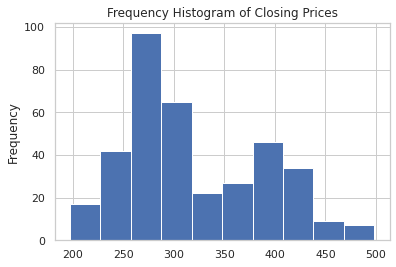

In [47]:
plt.hist(df['Close'], bins=10)
plt.gca().set(title='Frequency Histogram of Closing Prices', ylabel='Frequency')
plt.show()

In [48]:
df[df['Close'] < 20000].count()

Open         366
High         366
Low          366
Close        366
Adj Close    366
Volume       366
dtype: int64

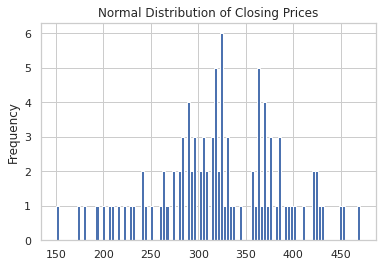

In [49]:
x = np.random.normal(df['Close'].mean(), df['Close'].std(), 100)
plt.gca().set(title='Normal Distribution of Closing Prices', ylabel='Frequency')
plt.hist(x, 100)
plt.show()

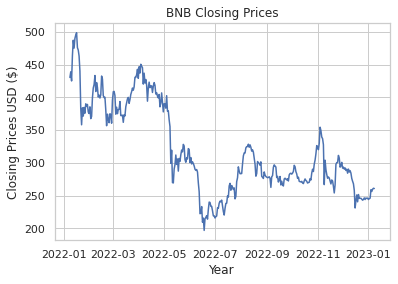

In [50]:
plt.plot(df.index,df['Close'])
plt.gca().set(title='BNB Closing Prices', xlabel='Year', ylabel='Closing Prices USD ($)')
plt.show()

In [51]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x = df.index,
                                        open = df["Open"], 
                                        high = df["High"],
                                        low = df["Low"], 
                                        close = df["Close"])])
figure.update_layout(title = "BNB - Candlestick Chart", xaxis_title='Year',yaxis_title='Close Price USD ($)',
                     xaxis_rangeslider_visible = False)
figure.show()

<AxesSubplot:title={'center':'BNB Close Prices'}, xlabel='Date'>

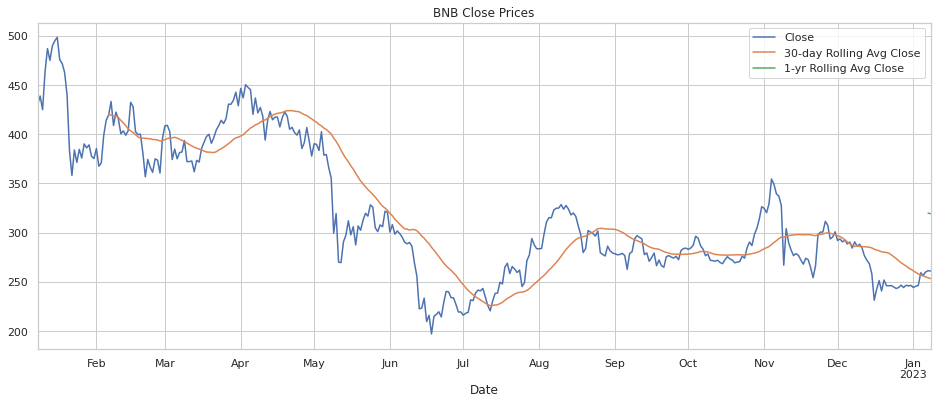

In [52]:
df['Close'].plot(title='BNB Close Prices',label='Close',legend=True)
df.rolling(30).mean()['Close'].plot(figsize=(16,6), label='30-day Rolling Avg Close', legend=True)
df.rolling(365).mean()['Close'].plot(figsize=(16,6), label='1-yr Rolling Avg Close', legend=True)

In [53]:
import plotly.express as px
date_start = '2022-01-01'
date_end = '2023-01-01'
figure = px.line(df, x = df.index, 
                 y = 'Close', 
                 range_x = [date_start,date_end], 
                 title = "BNB Analysis {} to {}".format(date_start, date_end))
figure.show()

<AxesSubplot:title={'center':'BNB Close Prices'}, xlabel='Date'>

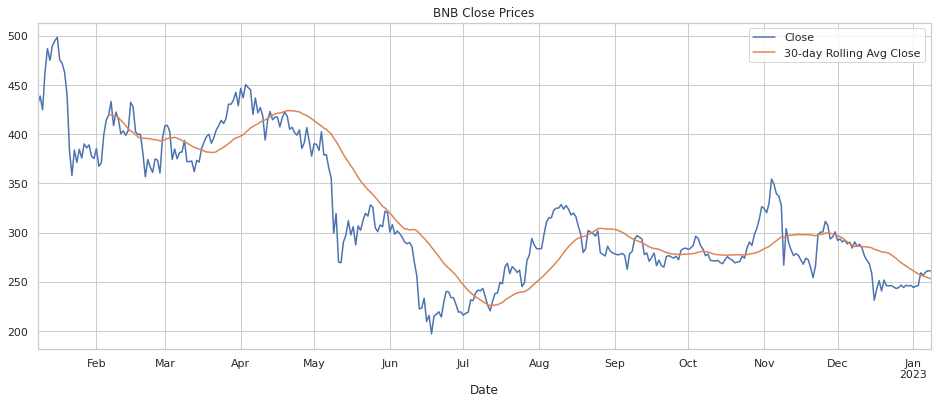

In [54]:
df['Close'].plot(title='BNB Close Prices',label='Close',legend=True)
df.rolling(30).mean()['Close'].plot(figsize=(16,6), label='30-day Rolling Avg Close', legend=True)

In [55]:
df1 = pd.read_csv('/kaggle/input/crypto/BNB-USD.csv')
fig = go.Figure()

fig.add_trace(go.Scatter(x=df1.Date, y=df1.Close, name='Close',  marker_color='Red'))
fig.add_trace(go.Scatter(x=df1.Date, y=df1.Open, name='Open' , marker_color='Green'))
fig.add_trace(go.Scatter(x=df1.Date, y=df1.High, mode='lines', name='High', marker_color='Yellow')) 
fig.add_trace(go.Scatter(x=df1.Date, y=df1.Low, name='Low', marker_color='Violet') )

fig.show()

In [56]:
data = pd.read_csv('/kaggle/input/crypto/BNB-USD.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [57]:
from itertools import cycle
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(data, x=data.Date, y=[data['Open'], data['Close'], 
                                          data['High'], data['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [58]:
monthvise= data.groupby(data['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,385.021291,383.181634
February,393.852540,394.614115
March,396.261171,397.352503
April,417.316946,415.605955
May,326.631463,324.777569
June,253.123440,249.748236
July,246.791995,248.866326
August,302.907766,302.763520
September,277.855970,278.032468


In [59]:
data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = data.groupby(data['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [60]:
data.groupby(data['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = data.groupby(data['Date'].dt.strftime('%B'))['Open'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = data.groupby(data['Date'].dt.strftime('%B'))['Close'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock open Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock close Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise open and close stock price')
fig.show()

> ## Train - Test Split

In [61]:
import math

#Only using the prices from the Close column in our dataset
close_prices = df.filter(['Close'])

close_price_df = close_prices.values

training_len = math.ceil(len(close_price_df) * 0.80)

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(close_price_df)

In [63]:
train_data = scaled_data[0: training_len, :]

In [64]:
x_train = [] 
y_train = [] 

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) 
    y_train.append(train_data[i,0]) 

In [65]:
print('Length of list (y_train): ', len(y_train))
print('The type of this: ',type(y_train))

Length of list (y_train):  233
The type of this:  <class 'list'>


In [66]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [67]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

> ## Building the LSTM Model

In [68]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1)) #We want one output
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(optimizer='adam', loss= 'mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
233/233 [==============================] - 8s 21ms/step - loss: 0.0115
Epoch 2/100
233/233 [==============================] - 5s 20ms/step - loss: 0.0052
Epoch 3/100
233/233 [==============================] - 5s 20ms/step - loss: 0.0054
Epoch 4/100
233/233 [==============================] - 5s 21ms/step - loss: 0.0036
Epoch 5/100
233/233 [==============================] - 5s 23ms/step - loss: 0.0028
Epoch 6/100
233/233 [==============================] - 5s 20ms/step - loss: 0.0029
Epoch 7/100
233/233 [==============================] - 5s 21ms/step - loss: 0.0024
Epoch 8/100
233/233 [==============================] - 5s 21ms/step - loss: 0.0022
Epoch 9/100
233/233 [==============================] - 5s 20ms/step - loss: 0.0021
Epoch 10/100
233/233 [==============================] - 5s 20ms/step - loss: 0.0021
Epoch 11/100
233/233 [==============================] - 5s 22ms/step - loss: 0.0018
Epoch 12/100
233/233 [==============================] - 5s 20ms/step - loss: 0.0018
E

In [70]:
test_data = scaled_data[training_len-60:,:]

x_test = []

y_test = close_price_df[training_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

> ## Predict the model

In [71]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
predictions[:5]


array([[293.80643],
       [299.27023],
       [311.26685],
       [322.45004],
       [334.35287]], dtype=float32)

> ## RMSE

In [72]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print(rmse)

14.419570322209696


> ## Visualizing Predictions Vs Actuals

In [73]:
data  = df.filter(['Close'])

train = data[:training_len]
valuation = data[training_len:]

valuation['Predictions'] = predictions

valuation.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Predictions
Date,,
2022-10-28,298.014191,293.806427
2022-10-29,304.217957,299.270233
2022-10-30,313.754791,311.266846
2022-10-31,326.360718,322.450043
2022-11-01,324.579437,334.352875


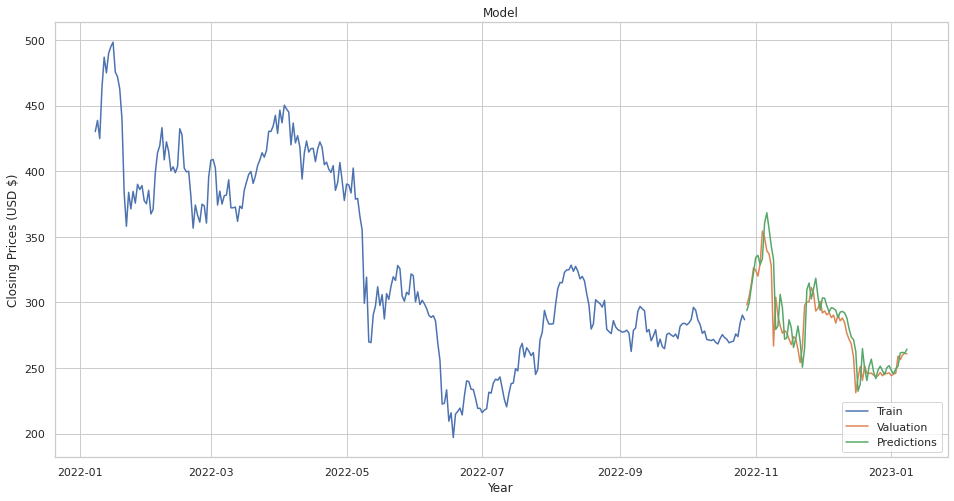

In [74]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Year')
plt.ylabel('Closing Prices (USD $)')
plt.plot(train)

plt.plot(valuation[['Close','Predictions']])
plt.legend(['Train','Valuation','Predictions'], loc='lower right')
plt.show()

> ## Training and Predicting Using Random Forest

In [75]:
df = pd.read_csv('/kaggle/input/crypto/BNB-USD.csv',index_col = ['Date'], parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-08,447.856812,458.483795,419.195465,430.246155,430.246155,4068139021
2022-01-09,430.253113,444.493256,428.239502,438.803070,438.803070,3347862691
2022-01-10,438.785645,445.036163,408.698792,424.933777,424.933777,4156063326
2022-01-11,424.891205,467.281067,422.000916,463.518311,463.518311,4600615710
2022-01-12,463.562744,489.327301,457.116119,487.007416,487.007416,4131335431


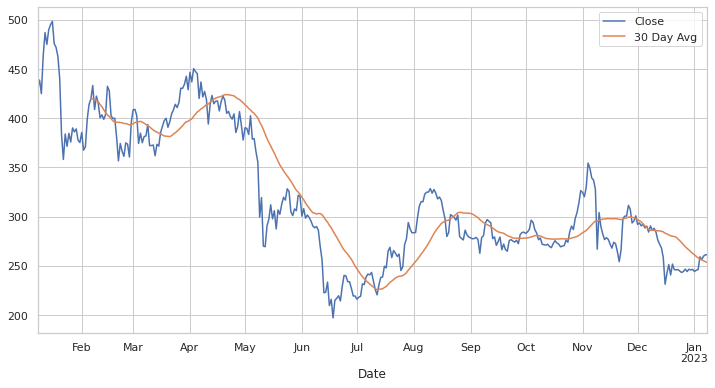

In [76]:
# Plotting the rolling 30 day average against the Close Price
sns.set()
sns.set_style('whitegrid')
df['Close'].plot(figsize=(12,6),label='Close')
df['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

In [77]:
df['ohlc_average'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

In [78]:
df['Price_After_Month']=df['Close'].shift(-30)

In [79]:
from sklearn import preprocessing
df.dropna(inplace=True)
X=df.drop('Price_After_Month',axis=1)
X=preprocessing.scale(X)
y=df['Price_After_Month']

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:236: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [81]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=101)

In [82]:
preds = reg.predict(X_test)

In [83]:
preds = reg.predict(X_test)

In [84]:
X_30=X[-30:]
forecast=reg.predict(X_30)

In [85]:
from datetime import datetime, timedelta
last_date=df.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
df=df.append(df1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,ohlc_average,Price_After_Month,Forecast
2022-01-08,447.856812,458.483795,419.195465,430.246155,430.246155,4.068139e+09,438.945557,433.229279,NaN
2022-01-09,430.253113,444.493256,428.239502,438.803070,438.803070,3.347863e+09,435.447235,408.776764,NaN
2022-01-10,438.785645,445.036163,408.698792,424.933777,424.933777,4.156063e+09,429.363594,422.465546,NaN
2022-01-11,424.891205,467.281067,422.000916,463.518311,463.518311,4.600616e+09,444.422875,415.119232,NaN
2022-01-12,463.562744,489.327301,457.116119,487.007416,487.007416,4.131335e+09,474.253395,400.422394,NaN


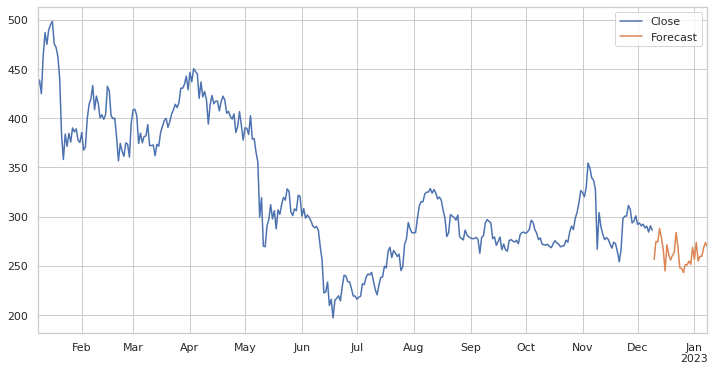

In [86]:
df['Close'].plot(figsize=(12,6),label='Close')
df['Forecast'].plot()
plt.legend()